# Loading and Preprocessing

In [1]:
import pandas as pd
from sklearn.datasets import load_iris 
from sklearn.preprocessing import StandardScaler

In [3]:
iris = load_iris()

In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
scaler = StandardScaler()
df_scaled =scaler.fit_transform(df)

In [19]:
df_scaled = pd.DataFrame(df_scaled, columns=iris.feature_names)

# Kmeans Clustering implementation

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [174]:
# KMeans with K=3 
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

C:\Users\altha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


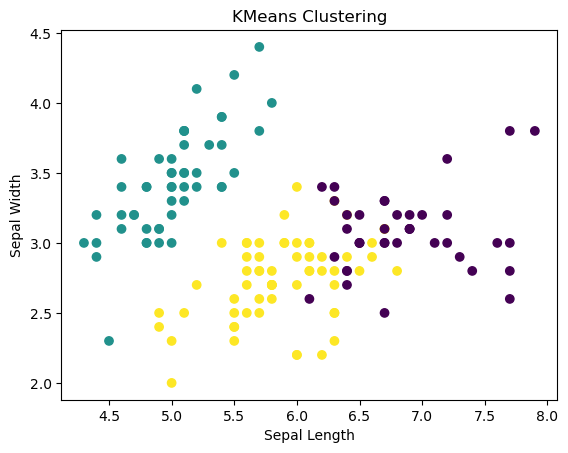

In [45]:
# Visualizing the KMeans clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['KMeans_Cluster'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KMeans Clustering')
plt.show()

# Hierarchical Clustering

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [50]:
# Perform hierarchical
Z = linkage(df, 'ward')

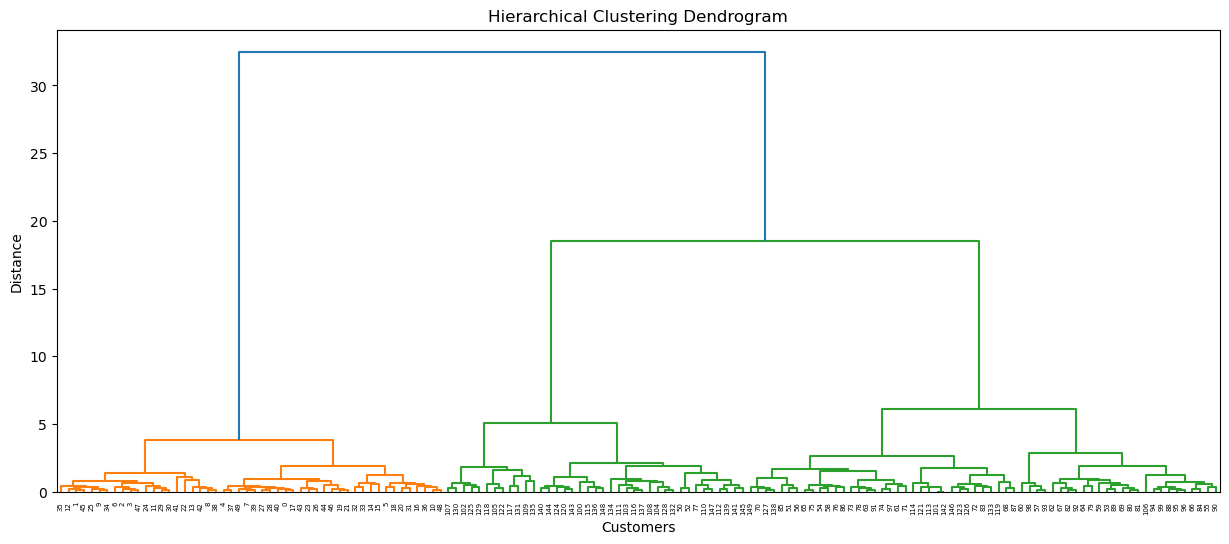

In [56]:
# dendrogram to visualize the clustering
plt.figure(figsize=(15, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [172]:
import scipy.cluster.hierarchy as sch

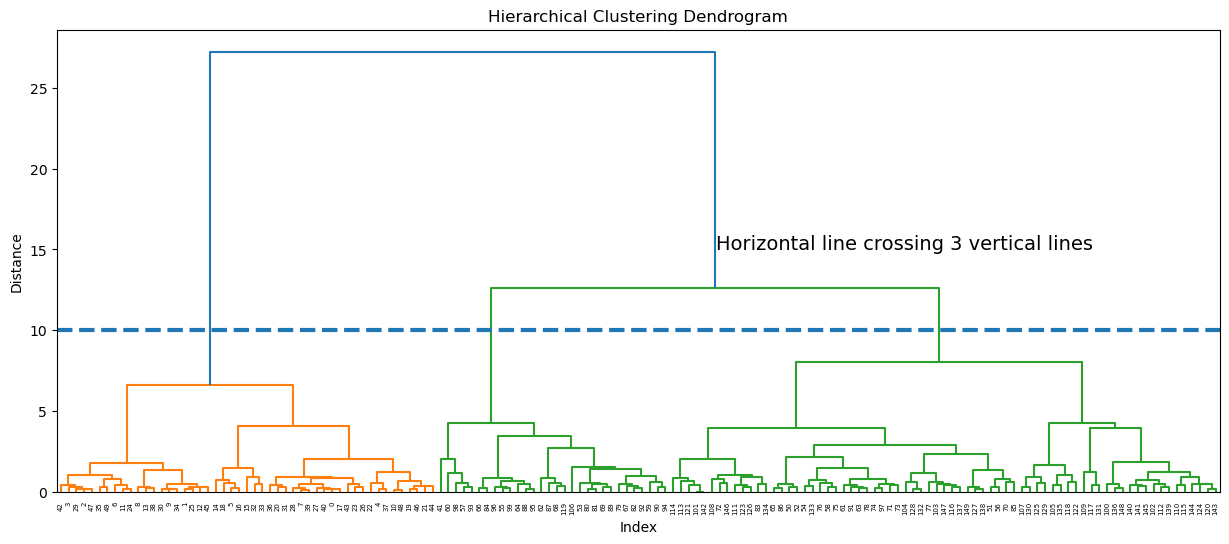

In [176]:
Z = sch.linkage(df_scaled, method='ward')
plt.figure(figsize=(15, 6))
dendrogram_result = sch.dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.hlines(y=10,xmin=0,xmax=2000,lw=3,linestyles='--')
for i, d in zip(dendrogram_result['icoord'], dendrogram_result['dcoord']):
    for xi, yi in zip(i, d):
        if yi > 10:  
            plt.vlines(x=xi, ymin=0, ymax=0, colors='red', linestyles='--', lw=1)
plt.text(x=850, y=15, s='Horizontal line crossing 3 vertical lines', fontsize=14)
plt.show()